## Homework sheet 11
### Due 03/02/2023

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

df = pd.read_csv("ex-11-data.csv") # You can find this file in the GitHub repository

The dataframe `df` contains results from 10 thousand simulations of a given astrophysical source:

In [2]:
print(len(df))
df.head()

10000


,B,gamma_min,gamma_max,alpha,delta,chi_squared
0,0.1,1000.0,10000.0,2.0,3.00,0.438884
1,0.1,1000.0,10000.0,2.0,3.56,0.328649
2,0.1,1000.0,10000.0,2.0,4.11,0.249397
3,0.1,1000.0,10000.0,2.0,4.67,0.189010
4,0.1,1000.0,10000.0,2.0,5.22,0.144258


The first five columns contain the values of the five model parameters: $B$, $\gamma_\min$, $\gamma_\max$, $\alpha$, and $\delta$.

The last column, `chi_squared`, has the $\chi^2$ value of the respective fit. The lower the value of $\chi^2$, the better those five parameter values fit the data.

These results are spread over a five-dimensional parameter space on an equally spaced grid. Because we can't visualize multi-dimensional parameter spaces, we usually pick two prameters and plot a 2D "slice" of our 5D parameter space. We call this "marginalizing" over the remaining three parameters. 

This is what we are doing in the plot below, which shows $\chi^2$ as a function of $\gamma_\min$ and $\gamma_\max$. We first find the parameter values that give the best fit in the whole database (magenta point), then we fix the values of $B$, $\alpha$ and $\delta$, and then we plot the $\chi^2$ value in ($\gamma_\min$, $\gamma_\max$) space.

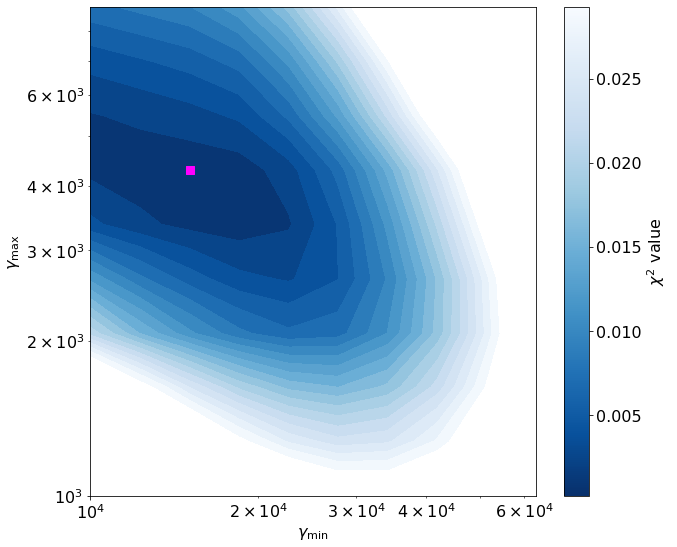

In [178]:
from IPython.display import Image
Image(filename='ex-11-example.png')

In the above plot:

- the x-axis represents values of the parameter $\gamma_\min$
- the y-axis represents values of the parameter $\gamma_\max$
- the shade of blue represents the value of $\chi^2$ (shown in the legend)
- the magenta point represents the best fit (lowest $\chi^2$) of the entire data base.
- the remaining three parameters ($B$, $\alpha$ and $\delta$) have **fixed** values

Let's reproduce this plot starting from our database.

1. Find the row of `df` with the best-fit parameters, which is that with the lowest value of $\chi^2$. *(20 points)*

2. Now find all the rows in `df` that have the same values of $B$, $\alpha$ and $\delta$ as your best-fit row. Save this subset of rows as a new dataframe `df_selected`. *(20 points)*

3. Sort `df_selected` by ascending values of $\gamma_\min$ and $\gamma_\max$, and store it as `df_sorted`. *(20 points)*

    *Hint: last Friday we only used `sort_values` to sort over a single column, but you can actually call this function with a list of column names, in this case ['gamma_min', 'gamma_max']. This is an extremely useful feature for organizing tables with several parameters!*
 
4. Now that your rows are sorted, create arrays `gamma_min_arr`, `gamma_max_arr` and `chi_squared_arr` with the values of the columns $\gamma_\min$, $\gamma_\max$ and $\chi^2$ from `df_sorted`. This will be used for creating the x, y and z arrays for our contour plot. *(20 points)*

5. Finally, we need the magenta point. Create the variables `gamma_min_best_fit` and `gamma_max_best_fit` with the best-fit value of $\gamma_\min$ and $\gamma_\max$ that you found in (1). *(20 points)*

In [ ]:
# Your solution here ...



In [ ]:
# Now we build our plot:

xvals = np.unique(gamma_min_arr)                                   # np.unique eliminates all the repeated values
yvals = np.unique(gamma_max_arr)
zvals = np.array(chi_squared_arr).reshape(xvals.size, yvals.size)  # Create 2D array from the chi2 values

f1 = plt.figure(figsize=(10,9))

# Prepare color scale
levels = np.linspace(0, 0.01, 20)
bluemap = plt.gca().pcolor(zvals, cmap='Blues_r')
cb = plt.colorbar(bluemap)
cb.set_label(label=r'$\chi^2$ value', size=16)

# Plot map and best fit
plt.contourf(yvals, xvals, zvals, cmap='Blues_r', levels=levels)   # Plot blue map
plt.scatter([gamma_max_best_fit], [gamma_min_best_fit],            # Plot best-fit point
            marker='s', s=50, color='magenta') 
plt.loglog()

plt.xlabel(r'$\gamma_\min$', fontsize=16)
plt.ylabel(r'$\gamma_\max$', fontsize=16)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

plt.axis([yvals[0], yvals[-1], xvals[0], xvals[-1]])

plt.show()